In [47]:
# imports
import pickle
import pandas as pd

# load pickle of lists
path = r"C:\Users\User\OneDrive\Desktop\Documents\06 Education\06 LHL\projects\drug-testing-project\data_files"
file = r"\df_lists-2023-01-03.pkl"
result_lists = pickle.load(open(path + file, 'rb'))

# concatenate all lists into one dataframe
df = result_lists[0]

for i in range(len(result_lists[1:])):
    df = pd.concat([df, result_lists[i]])
    
df = df.reset_index(drop=True)

# change visit date to datetime
df['VISIT DATE'] = pd.to_datetime(df['VISIT DATE'])

# expand FTIR spectrometer results
results = df['FTIR SPECTROMETER'].str.split(', ', expand=True).add_prefix('FTIR SPECTROMETER ')
df = pd.concat([df, results], axis=1).drop(columns='FTIR SPECTROMETER')

# drop rows with all NaN values
df = df.dropna(how='all')

# pickle the cleaned dataframe
file = open((path + r"\df-2023-01-03.pkl"),'wb')
pickle.dump(df, file)
file.close()

In [48]:
path = r"C:\Users\User\OneDrive\Desktop\Documents\06 Education\06 LHL\projects\drug-testing-project\data_files"
file = r"\df-2023-01-03.pkl"
df = pickle.load(open(path + file, 'rb'))

In [49]:
df.head()

,VISIT DATE,CITY,SITE,EXPECTED DRUG,CATEGORY,COLOUR,TEXTURE,FENTANYL STRIP,BENZO STRIP,FTIR SPECTROMETER 0,FTIR SPECTROMETER 1,FTIR SPECTROMETER 2,FTIR SPECTROMETER 3,FTIR SPECTROMETER 4,FTIR SPECTROMETER 5
1,2022-11-30,Vancouver,Get Your Drugs Tested,Methamphetamine,Stimulant,Colourless,Crystal,Neg,Neg,Methamphetamine,None,None,None,None,None
2,2022-11-30,Vancouver,Insite,Ketamine,Psychedelic,Colourless,Crystal,Neg,NaN,Ketamine,None,None,None,None,None
3,2022-11-30,Vancouver,Insite,Fentanyl,Opioid,Purple (light),Pebble,Pos,Neg,Caffeine,Fentanyl,Erythritol,None,None,None
4,2022-11-30,Vancouver,Get Your Drugs Tested,Down (Unknown Opioid),Opioid,Purple,Powder,Pos,Neg,Caffeine,Fentanyl,Erythritol,None,None,None
5,2022-11-30,Kelowna,Outreach Urban Health,Down (Unknown Opioid),Opioid,Purple (light),Chunk,Pos,Pos,Caffeine,Erythritol,Fentanyl,Desalkylgidazepam,None,None


In [50]:
df.shape

(50040, 15)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50040 entries, 1 to 52541
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   VISIT DATE           50040 non-null  datetime64[ns]
 1   CITY                 50040 non-null  object        
 2   SITE                 50040 non-null  object        
 3   EXPECTED  DRUG       50040 non-null  object        
 4   CATEGORY             50040 non-null  object        
 5   COLOUR               50040 non-null  object        
 6   TEXTURE              50040 non-null  object        
 7   FENTANYL  STRIP      48405 non-null  object        
 8   BENZO  STRIP         24243 non-null  object        
 9   FTIR SPECTROMETER 0  49506 non-null  object        
 10  FTIR SPECTROMETER 1  29574 non-null  object        
 11  FTIR SPECTROMETER 2  17404 non-null  object        
 12  FTIR SPECTROMETER 3  5007 non-null   object        
 13  FTIR SPECTROMETER 4  778 non-nu

In [52]:
df.describe()

C:\Users\User\AppData\Local\Temp\ipykernel_37792\3627053830.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,VISIT DATE,CITY,SITE,EXPECTED DRUG,CATEGORY,COLOUR,TEXTURE,FENTANYL STRIP,BENZO STRIP,FTIR SPECTROMETER 0,FTIR SPECTROMETER 1,FTIR SPECTROMETER 2,FTIR SPECTROMETER 3,FTIR SPECTROMETER 4,FTIR SPECTROMETER 5
count,50040,50040,50040,50040,50040,50040,50040,48405,24243,49506,29574,17404,5007,778,126
unique,1062,33,96,368,7,32,15,3,3,374,295,187,116,54,26
top,2021-07-31 00:00:00,Vancouver,Get Your Drugs Tested,Down (Unknown Opioid),Opioid,White,Powder,Neg,Neg,Caffeine,Caffeine,Caffeine,Caffeine,Caffeine,Caffeine
freq,169,41489,35389,8558,18968,18916,12998,30777,16914,6082,5237,3766,1030,154,31
first,2019-12-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2022-11-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df.tail()

,VISIT DATE,CITY,SITE,EXPECTED DRUG,CATEGORY,COLOUR,TEXTURE,FENTANYL STRIP,BENZO STRIP,FTIR SPECTROMETER 0,FTIR SPECTROMETER 1,FTIR SPECTROMETER 2,FTIR SPECTROMETER 3,FTIR SPECTROMETER 4,FTIR SPECTROMETER 5
52537,2019-12-02,Vancouver,SisterSpace,Down (Unknown Opioid),Opioid,Brown (dark),Powder,Pos,Neg,Polyethylene glycol,Inositol,Fentanyl,Heroin hcl,Caffeine,None
52538,2019-12-02,Kamloops,The Branch,Cocaine,Stimulant,White,Powder,Neg,NaN,Cocaine hcl,None,None,None,None,None
52539,2019-12-02,Kamloops,The Branch,Fentanyl,Opioid,Purple (light),Pebble,Pos,NaN,Mannitol,Caffeine,None,None,None,None
52540,2019-12-02,Kamloops,The Branch,Down (Unknown Opioid),Opioid,Pink (light),Chunk,Pos,NaN,Mannitol,Fentanyl,Caffeine,None,None,None
52541,2019-12-02,Kamloops,The Branch,Fentanyl,Opioid,Purple,Granules,Pos,NaN,Caffeine,Fentanyl,Xylitol,None,None,None


In [56]:
df_visits = df.groupby(df['VISIT DATE'])['VISIT DATE'].count()

In [57]:
df_visits

VISIT DATE
2019-12-02     5
2019-12-03     7
2019-12-04     5
2019-12-05    21
2019-12-09    10
              ..
2022-11-26    51
2022-11-27    44
2022-11-28    80
2022-11-29    71
2022-11-30    75
Name: VISIT DATE, Length: 1062, dtype: int64

In [58]:
from matplotlib import pyplot as plt

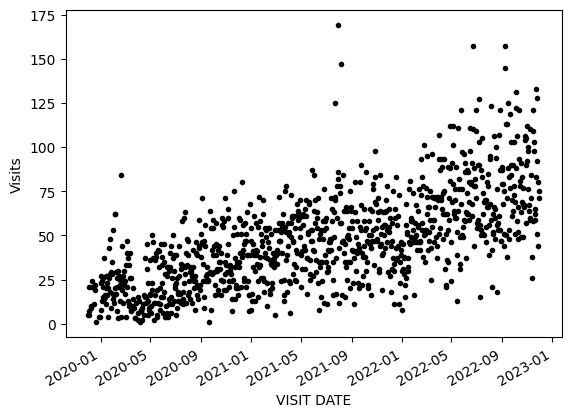

In [71]:
df_visits.plot(style='k.')
plt.ylabel('Visits')
plt.show()